In [3]:
import fastf1
fastf1.Cache.enable_cache('./f1cache')

session = fastf1.get_session(2022, 'abu dhabi', 'R')
session.load(telemetry=True, laps=True, weather=False)
session.load_telemetry()
laps = session.laps
laps.head(0)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.9]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']
/Users/jroga/Documents/f1 stats/f1thon/lib/python3.9/site-packages/fastf1/core.py:1139: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate


In [89]:
import pandas as pd

def get_lap(session: pd.DataFrame, driver: str, lap_min: int = -1, lap_max: int = -1):
    laps = session.laps.pick_driver(driver).get_telemetry()
    laps["Time_s"] = laps["SessionTime"].dt.total_seconds()
    if lap_min != -1:
        start = session.laps.pick_driver(driver).query(f"LapNumber == {lap_min}")["LapStartTime"].dt.total_seconds().values[0]
        finish = session.laps.pick_driver(driver).query(f"LapNumber == {lap_max}")["LapStartTime"].dt.total_seconds().values[0]
        return laps.query(f"Time_s > {start} and Time_s < {finish}").set_index("Time")
    else:
        return laps.set_index("Time")

lec_lap = get_lap(session, "LEC", 1, 51)
per_lap = get_lap(session, "PER", 1, 56)
ham_lap = get_lap(session, "HAM", 1, 40)

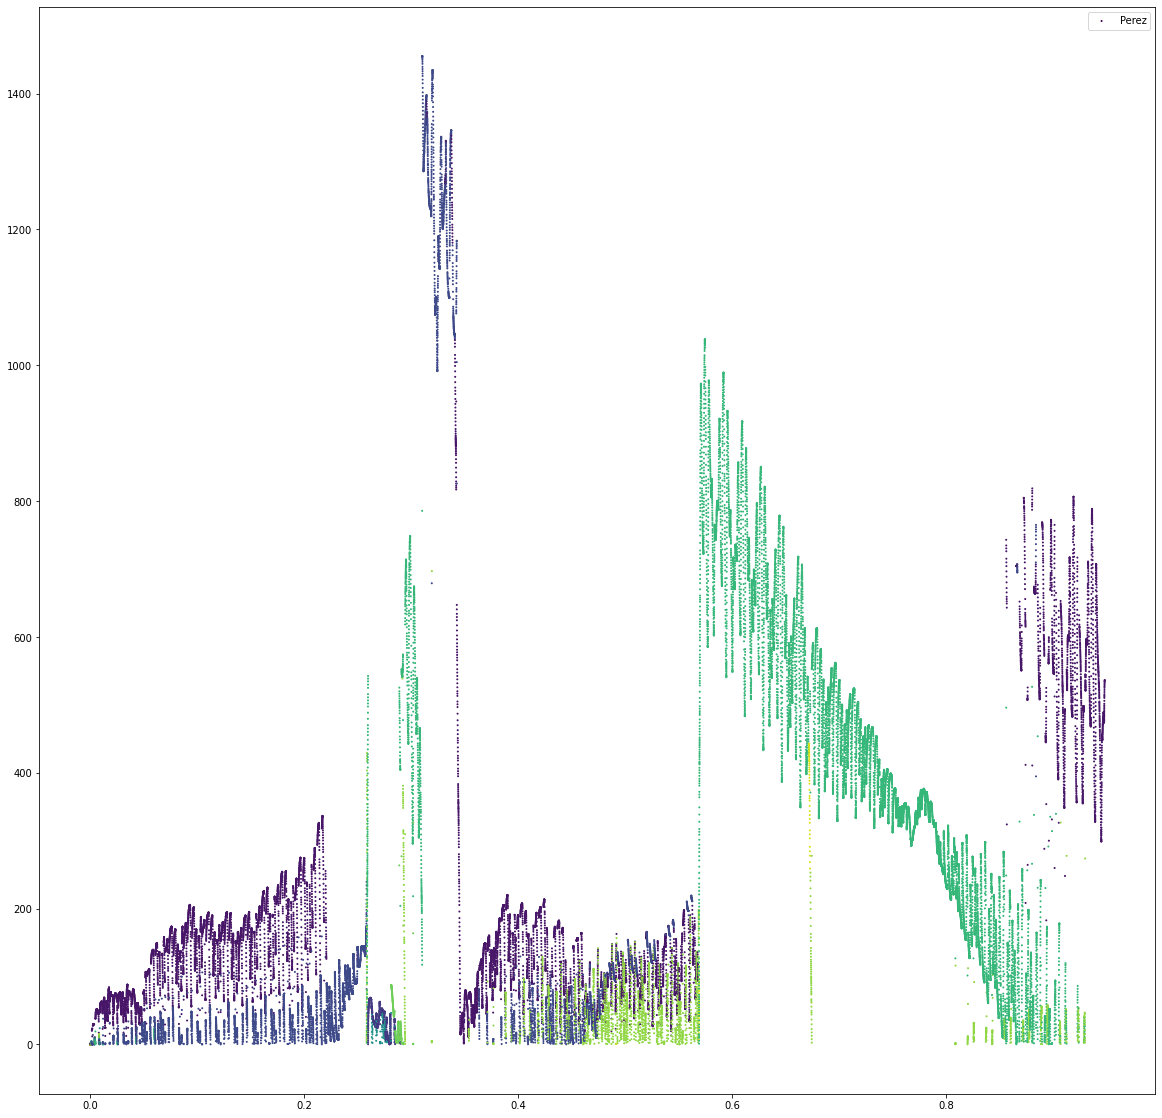

In [92]:
from matplotlib import pyplot as plt
lap = per_lap
plt.figure(figsize=(20, 20))
plt.scatter(lap["RelativeDistance"], lap["DistanceToDriverAhead"], c=lap["DriverAhead"].astype("category").cat.codes, s=1, label="Perez")
plt.legend()

Time
0 days 01:14:32.635000    2
0 days 01:14:32.710000    2
0 days 01:14:32.795000    2
0 days 01:14:32.990000    2
0 days 01:14:33.075000    2
                         ..
0 days 01:23:26.757000    0
0 days 01:23:26.771000    0
0 days 01:23:26.990000    0
0 days 01:23:27.117000    0
0 days 01:23:27.250000    0
Length: 4093, dtype: int8